In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy as sc

sns.set(style="whitegrid",font_scale=2)

%matplotlib inline

# Análisis de datos: Elecciones 2009

In [2]:
ruta="/home/diego/Escritorio/Thesis/clean_data/data/elecciones_09_12_15_18/"

In [3]:
df=pd.read_csv(ruta+"co_2009.csv")

In [4]:
df.head()

,Distrito,Delegación,Sección,Padrón Electoral,Lista Nominal,PAN,PRI,PRD,PT,PVEM,...,Voto Efectivo,%PAN_efec,%PRI_efec,%PRD_efec,%PT_efec,%PVEM_efec,%Convergencia_efec,%Nueva Alianza_efect,%PSD_efec,%Candidato Común_efec
0,XXVII,Coyoacán,345,1525,1518,205,94,198,42,33,...,623,0.3290529695,0.150882825,0.3178170144,0.0674157303,0.0529695024,0.0224719101,0.0192616372,0.0240770465,0.0160513644
1,XXVII,Coyoacán,346,462,461,78,36,47,13,9,...,200,0.39,0.18,0.235,0.065,0.045,0.02,0.035,0.025,0.005
2,XXVII,Coyoacán,347,1738,1734,341,127,160,41,37,...,755,0.4516556291,0.1682119205,0.2119205298,0.0543046358,0.0490066225,0.0145695364,0.021192053,0.021192053,0.0079470199
3,XXVII,Coyoacán,348,2073,2063,109,50,83,6,14,...,277,0.3935018051,0.1805054152,0.2996389892,0.0216606498,0.0505415162,0.0072202166,0.0108303249,0.0252707581,0.0108303249
4,XXVII,Coyoacán,349,1192,1188,251,106,102,29,26,...,554,0.4530685921,0.1913357401,0.1841155235,0.0523465704,0.0469314079,0.0180505415,0.0252707581,0.0252707581,0.0036101083


In [5]:
df.columns

Index(['Distrito', 'Delegación ', 'Sección', 'Padrón Electoral',
       'Lista Nominal', 'PAN', 'PRI', 'PRD', 'PT', 'PVEM', 'Convergencia',
       'Nueva Alianza', 'PSD', 'Candidatura Común PRD_PT_Convergencia',
       'Candidato Común', 'Votos Nulos', 'Votación Total', '%PAN', '%PRI',
       '%PRD', '%PT', '%PVEM', '%Convergencia', '%Nueva Alianza', '%PSD',
       '%Votos Nulos', '%Candidatura Común PRD_PT_Convergencia',
       'Voto Efectivo', '%PAN_efec', '%PRI_efec', '%PRD_efec', '%PT_efec',
       '%PVEM_efec', '%Convergencia_efec', '%Nueva Alianza_efect', '%PSD_efec',
       '%Candidato Común_efec'],
      dtype='object')

In [6]:
partidos=["PAN",'PRI','PRD','PT','PVEM','Convergencia','Nueva Alianza','PSD','Candidato Común','Candidatura Común PRD_PT_Convergencia','Votos Nulos']

In [7]:
totales=[]
nombres=[]
total=0
for i in partidos:
    totales.append(sum(df[i]))
    nombres.append(i)
    if i not in ["PRD","PT","Convergencia",'Candidato Común']:
        total+=sum(df[i])

tabla=pd.DataFrame(nombres)
tabla.columns=["FUERZA POLÍTICA"]
tabla["NUM VOTOS"]=totales
tabla

,FUERZA POLÍTICA,NUM VOTOS
0,PAN,73651
1,PRI,34625
2,PRD,74570
3,PT,16891
4,PVEM,12818
5,Convergencia,3817
6,Nueva Alianza,6027
7,PSD,3662
8,Candidato Común,4202
9,Candidatura Común PRD_PT_Convergencia,99480


Datos totales                            254154 <br>
Las fuerzas políticas con mayor votación en la eleccion de Coyoacán 2009 fueron <br>
Coalición PRD-PT-Convervencia con 99480 <br>
PAN con 73651 <br>
PRI con 34625 <br>
El PRD en solitario obtuvo 74570 votos no muy alejado del PAN <br>
la diferencia entre estos partidos es de apenas 919 votos.

Medidas de tendencia central, cuartiles y máximo y mínimo

In [8]:
pd.DataFrame(df["Votación Total"].describe())

,Votación Total
count,403.000000
mean,630.655087
std,206.053772
min,0.000000
25%,494.500000
50%,629.000000
75%,776.500000
max,1622.000000


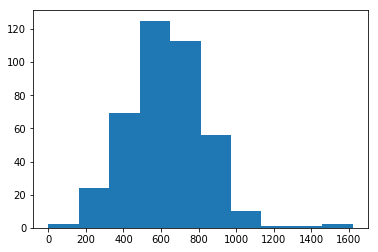

In [9]:
plt.hist(df["Votación Total"])
plt.show()

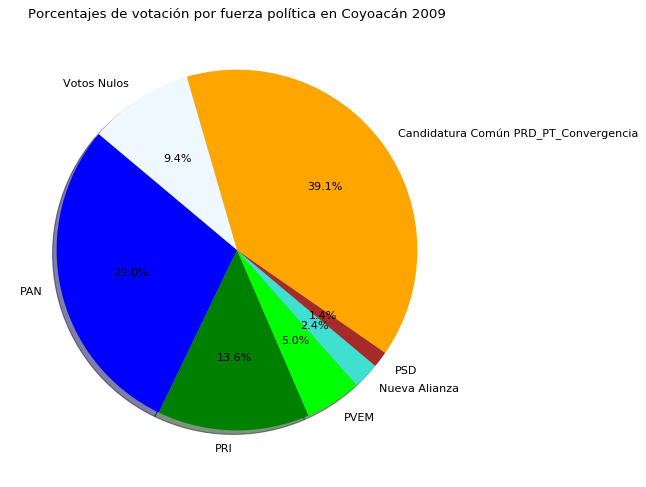

In [10]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
participantes=[i for i in partidos if i not in ["PRD","PT","Candidato Común","Convergencia"]]
totales=[]
for i in participantes:
    totales.append(sum(df[i]))
colors = ['blue', 'green','lime','turquoise','brown','orange','aliceblue']
#patches, texts = plt.pie(totales, colors=colors, shadow=True, startangle=90)
#plt.legend(patches,partidos, loc="best")
plt.pie(totales,labels=participantes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')
plt.title("Porcentajes de votación por fuerza política en Coyoacán 2009")
plt.tight_layout()
plt.show()

EL 39.1% De los votos fueron para la alianza PRD-PT-Convergencia ganando las elecciones de ese año. <br>
El segundo y tercer lugar fue para el PAN con 29.0% y PRI con 13.6% de los votos respectivamente. <br>
La cantidad de Votos nulos (9.4%) es superior incluso a la votación obtenida por algunos partidos.<br>

Veamos dentro de la candidatura de común PRD-PT-Convergencia la contribución de votos de cada partido.

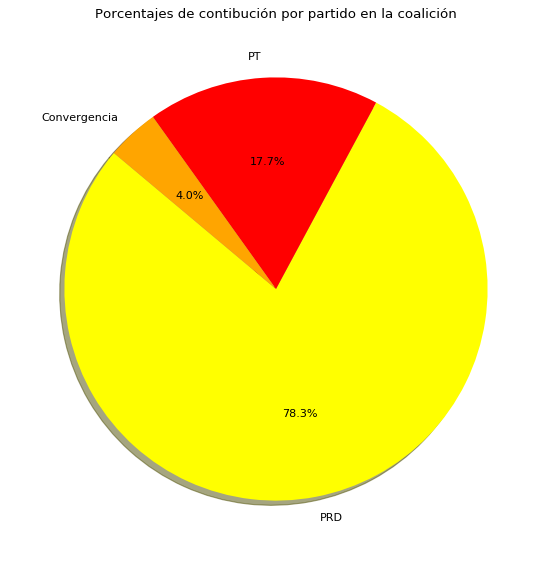

In [11]:
plt.figure(num=None, figsize=(7, 8), dpi=80, facecolor='w', edgecolor='k')
comun=["PRD","PT","Convergencia"]
size=[sum(df["PRD"]),sum(df["PT"]),sum(df["Convergencia"])]
colors=["yellow","red","orange"]

#Plot
plt.pie(size,labels=comun,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
#plt.axis('equal')
plt.tight_layout()
plt.title("Porcentajes de contibución por partido en la coalición")
plt.show()

Es predominante la contribución del 78.3%. por parte del PRD a la coalición.

In [12]:
participantes=[i for i in partidos if i not in ["PRD","PT","Candidato Común","Convergencia"]]

La distribución de los votos para cada partido y la coalición se muestra en la siguiente tabla

Obtenemos el razón de votos obtenidos en cada sección por medio de la siguiente normalización. Con $VO$: votos obtenidos y $VT$: votos totales y $RV$:Razón de votos. 
$$RV=\frac{VO}{VT}*100$$

La distribución de la razón de votos se muestra a continuación.

In [13]:
df.drop([172],inplace=True)
df[df["PAN"]==0]

,Distrito,Delegación,Sección,Padrón Electoral,Lista Nominal,PAN,PRI,PRD,PT,PVEM,...,Voto Efectivo,%PAN_efec,%PRI_efec,%PRD_efec,%PT_efec,%PVEM_efec,%Convergencia_efec,%Nueva Alianza_efect,%PSD_efec,%Candidato Común_efec


In [14]:
#Obtenemos el número de columnas por la regla de Sturges's
import math 
n=1+math.log(402,2)
#n=10

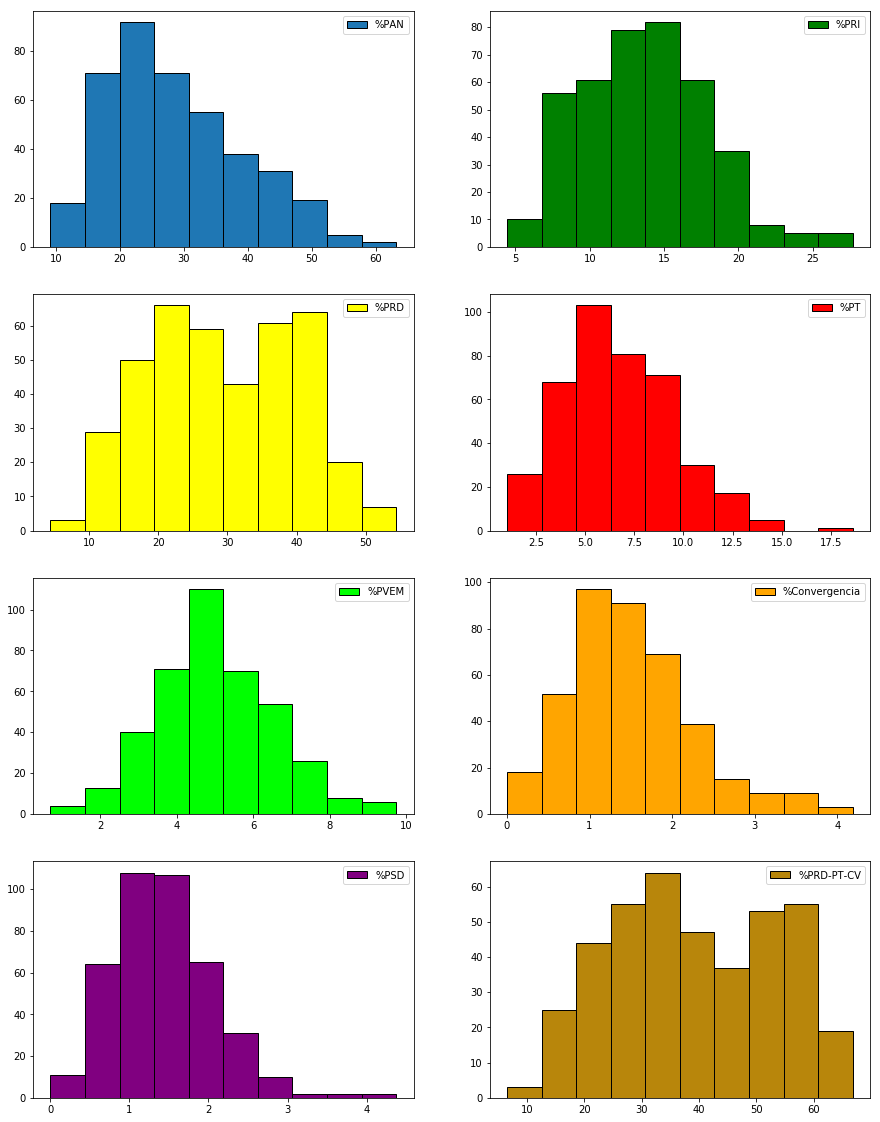

In [15]:
fig, axes=plt.subplots(4,2,figsize=(15,20))
ax=axes[0][0].hist(df["%PAN"],label="%PAN",ec="black")
ax=axes[0][0].legend()
ax=axes[0][1].hist(df["%PRI"],color="green",label="%PRI",ec="black")
ax=axes[0][1].legend()
ax=axes[1][0].hist(df["%PRD"],color="yellow",label="%PRD",ec="black")
ax=axes[1][0].legend()
ax=axes[1][1].hist(df["%PT"],color="red",label="%PT",ec="black")
ax=axes[1][1].legend()
ax=axes[2][0].hist(df["%PVEM"],color="lime",label="%PVEM",ec="black")
ax=axes[2][0].legend()
ax=axes[2][1].hist(df["%Convergencia"],color="orange",label="%Convergencia",ec="black")
ax=axes[2][1].legend()
ax=axes[3][0].hist(df["%PSD"],color="purple",label="%PSD",ec="black")
ax=axes[3][0].legend()
ax=axes[3][1].hist(df['%Candidatura Común PRD_PT_Convergencia'],color="darkgoldenrod",label="%PRD-PT-CV",ec="black")
ax=axes[3][1].legend()


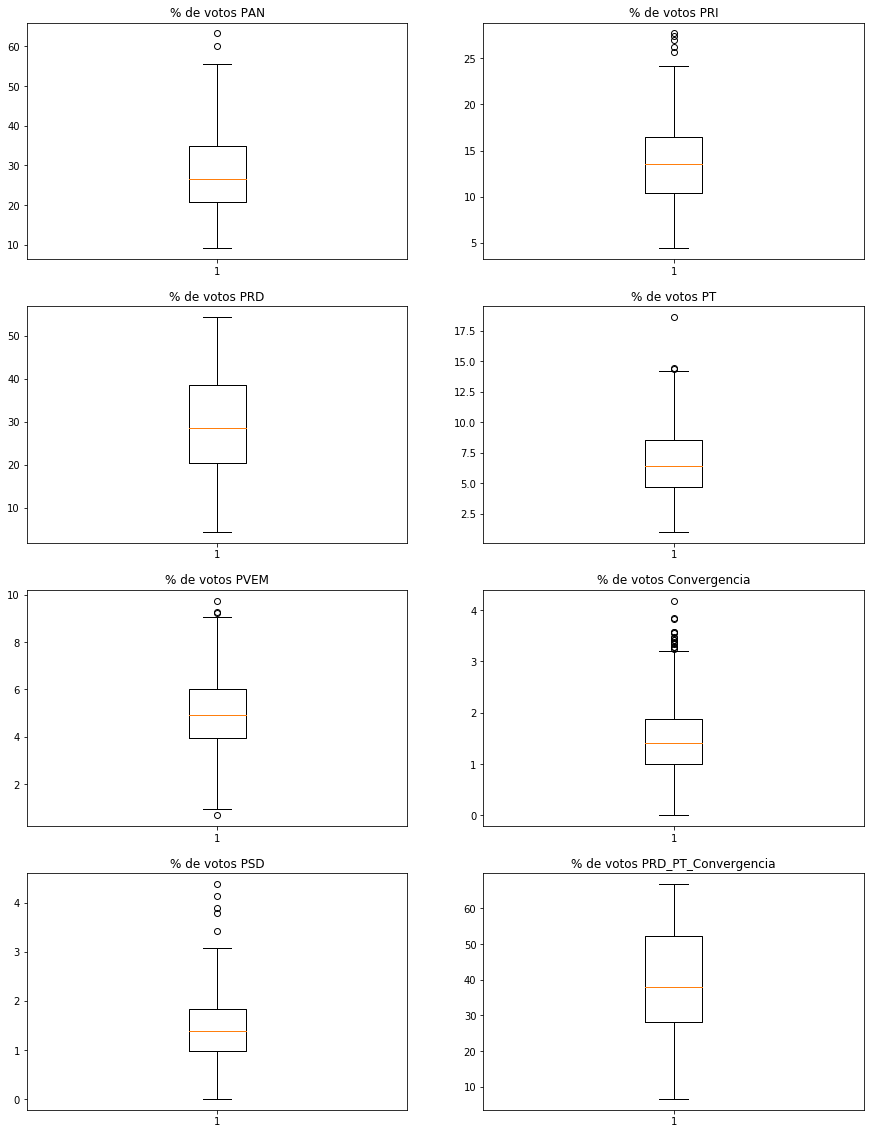

In [16]:
fig, axes=plt.subplots(4,2,figsize=(15,20))
ax=axes[0][0].boxplot(df["%PAN"])
ax=axes[0][0].set_title('% de votos PAN')
ax=axes[0][1].boxplot(df["%PRI"])
ax=axes[0][1].set_title('% de votos PRI')
ax=axes[1][0].boxplot(df["%PRD"])
ax=axes[1][0].set_title('% de votos PRD')
ax=axes[1][1].boxplot(df["%PT"])
ax=axes[1][1].set_title('% de votos PT')
ax=axes[2][0].boxplot(df["%PVEM"])
ax=axes[2][0].set_title('% de votos PVEM')
ax=axes[2][1].boxplot(df["%Convergencia"])
ax=axes[2][1].set_title('% de votos Convergencia')
ax=axes[3][0].boxplot(df["%PSD"])
ax=axes[3][0].set_title('% de votos PSD')
ax=axes[3][1].boxplot(df['%Candidatura Común PRD_PT_Convergencia'])
ax=axes[3][1].set_title('% de votos PRD_PT_Convergencia')

Vemos que la mayoría de los partidos tiene "puntos extremos". Esto es, existen ciertos distritos donde la votación hacia el partido fue mayor en terminos de porcentajes en comparación con la votación en otros distritos. Un análisis descriptivo espacial nos ayudará a saber cuales fueron esos distritos.

[]

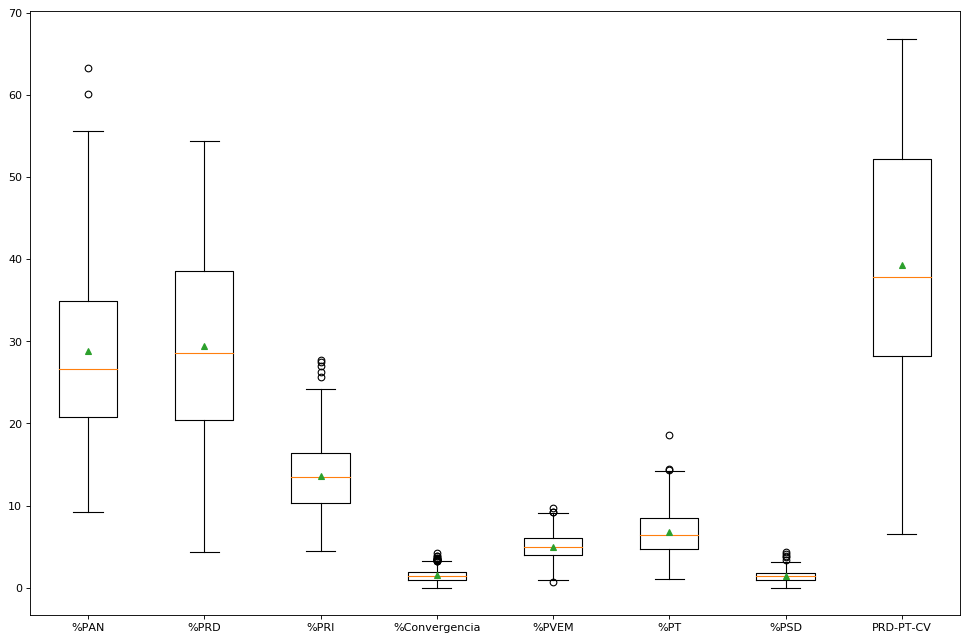

In [17]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([df["%PAN"],df["%PRD"],df["%PRI"],df["%Convergencia"],df["%PVEM"],df["%PT"],df["%PSD"],df["%Candidatura Común PRD_PT_Convergencia"]],labels=["%PAN","%PRD","%PRI","%Convergencia","%PVEM","%PT","%PSD","PRD-PT-CV"],showmeans=True)
plt.plot()

Entre las fuerzas políticas más votadas (PRD,PAN) veamos como se diferencian.

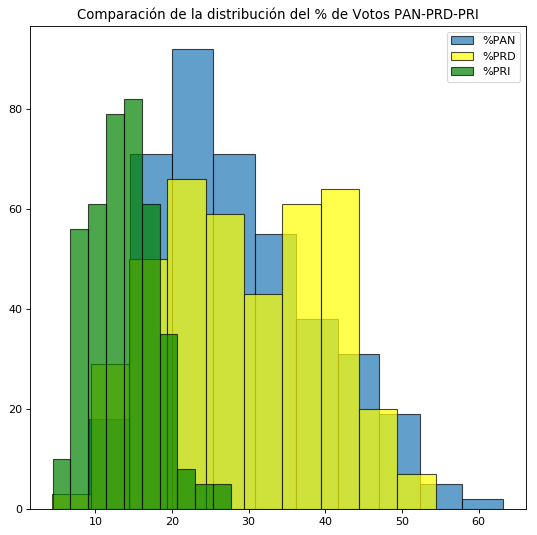

In [18]:
from matplotlib import pyplot
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
x =df["%PAN"]
y =df["%PRD"]
z=df["%PRI"]
pyplot.hist(x,alpha=0.7,label='%PAN',ec="black")
pyplot.hist(y,alpha=0.7,color="yellow",label='%PRD',ec="black")
pyplot.hist(z,alpha=0.7,color="green",label='%PRI',ec="black")
pyplot.legend(loc='upper right')
pyplot.title("Comparación de la distribución del % de Votos PAN-PRD-PRI")
pyplot.show()

Los porcentajes de votos para el PRI se encuentran muy concentrados a diferencia de los porcentajes del PAN y del PRD. <br>
Además vemos que hubo más votación entre 0.2 y el 0.4 para el PAN pero el PRD obtuvo mayoria de secciones donde se voto arriba del 40%. Aún así el PAN tuvo secciones con la el mayor porcentaje de votos a su favor. 

# Análisis de datos elecciones 2012

In [19]:
dt2=pd.read_csv(ruta+"co_2012.csv")

In [20]:
dt2.head()

,DISTRITO,CLAVE DE DELEGACIÓN,DELEGACIÓN,SECCIÓN,PAN,PRI,PRD,PT,PVEM,MC,...,%PRD,%PT,%PVEM,%MC,%NA,%PRI-PVEM CC1,%PRD-PT-MC CC2,%TOTAL PRD-PT-MC,%TOTAL PRI-PVEM,%VOTOS NULOS
0,XXVII,3,COYOACAN,345,256,141,368,46,9,23,...,36.471754,4.558969,0.891972,2.279485,2.081269,2.477701,9.018831,52.329039,17.343905,2.874133
1,XXVII,3,COYOACAN,346,104,43,85,12,0,11,...,29.824561,4.210526,0.000000,3.859649,1.754386,1.754386,4.210526,42.105263,16.842105,2.807018
2,XXVII,3,COYOACAN,347,458,175,398,49,19,30,...,30.757342,3.786708,1.468315,2.318393,1.545595,2.241113,6.259660,43.122102,17.233385,2.704791
3,XXVII,3,COYOACAN,348,456,194,564,77,19,35,...,37.154150,5.072464,1.251647,2.305665,1.317523,1.844532,5.731225,50.263505,15.876153,2.503294
4,XXVII,3,COYOACAN,349,274,134,210,28,9,20,...,27.131783,3.617571,1.162791,2.583979,1.937984,1.808786,5.297158,38.630491,20.284238,3.746770


In [21]:
list(dt2.columns)

['DISTRITO',
 'CLAVE DE\nDELEGACIÓN',
 'DELEGACIÓN',
 'SECCIÓN',
 'PAN',
 'PRI',
 'PRD',
 'PT',
 'PVEM',
 'MC',
 'NA',
 'PRI-PVEM CC1',
 'PRD-PT-MC CC2',
 'VOTOS\nNULOS',
 'TOTAL PRI-PVEM',
 'TOTAL PRD-PT-MC',
 'VOTACION\nTOTAL',
 'LISTA NOMINAL',
 'PADRÓN ELECTORAL',
 '%PAN',
 '%PRI',
 '%PRD',
 '%PT',
 '%PVEM',
 '%MC',
 '%NA',
 '%PRI-PVEM CC1',
 '%PRD-PT-MC CC2 ',
 '%TOTAL PRD-PT-MC',
 '%TOTAL PRI-PVEM',
 '%VOTOS\nNULOS']

In [22]:
partidos2=["PAN","PRI","PRD","PT","PVEM",'MC',"NA","TOTAL PRI-PVEM","TOTAL PRD-PT-MC","VOTOS\nNULOS"]
no=["PRD","PT","MC",'PRI',"PVEM"]

In [23]:
def conteo(partidos2,no_part):
    totales2=[]
    nombres2=[]
    total2=0
    for i in partidos2:
        totales2.append(sum(dt2[i]))
        nombres2.append(i)
        if i not in no_part:
            total2+=sum(dt2[i])
    return(total2,totales2,nombres2)

In [24]:
total2,totales2,nombres2=conteo(partidos2,no)

In [25]:
print(total2,sum(dt2["VOTACION\nTOTAL"]))

382787 382787


In [26]:
table2=pd.DataFrame(nombres2)
table2.columns=["Fuerza política"]
table2["Votos"]=totales2
table2

,Fuerza política,Votos
0,PAN,96173
1,PRI,50201
2,PRD,141717
3,PT,15613
4,PVEM,5762
5,MC,9224
6,NA,7487
7,TOTAL PRI-PVEM,65001
8,TOTAL PRD-PT-MC,203620
9,VOTOS\nNULOS,10506


In [27]:
pd.DataFrame(dt2["VOTACION\nTOTAL"].describe())

,VOTACION TOTAL
count,403.000000
mean,949.843672
std,313.378815
min,180.000000
25%,760.500000
50%,928.000000
75%,1139.000000
max,2651.000000


(array([ 10.,  61., 127., 121.,  64.,  14.,   2.,   0.,   2.,   2.]),
 array([ 180. ,  427.1,  674.2,  921.3, 1168.4, 1415.5, 1662.6, 1909.7,
        2156.8, 2403.9, 2651. ]),
 <a list of 10 Patch objects>)

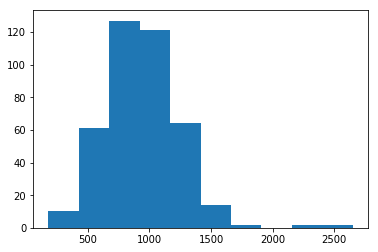

In [28]:
plt.hist(dt2["VOTACION\nTOTAL"])

In [29]:
totales2

[96173, 50201, 141717, 15613, 5762, 9224, 7487, 65001, 203620, 10506]

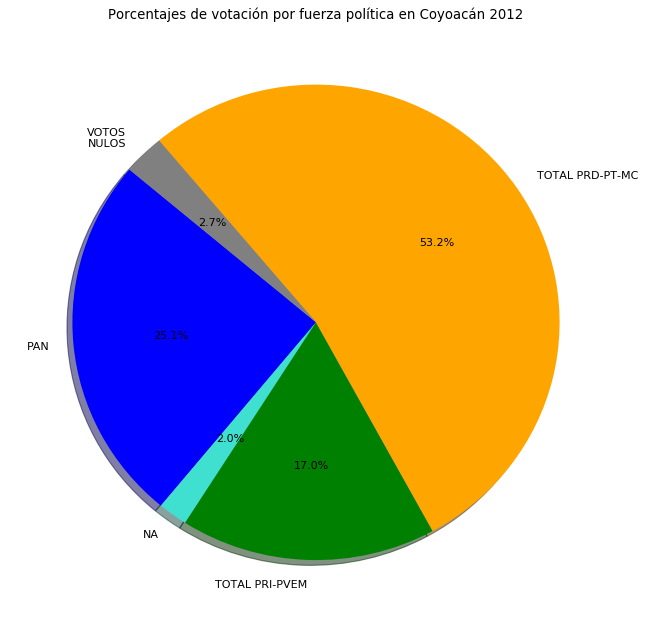

In [30]:
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
participantes=[i for i in partidos2 if i not in ["PRI","PRD","PT","PVEM","MC"]]
totales2=[]
for i in participantes:
    totales2.append(sum(dt2[i]))
colors = ['blue','turquoise','green','orange','gray']
#patches, texts = plt.pie(totales, colors=colors, shadow=True, startangle=90)
#plt.legend(patches,partidos, loc="best")
plt.pie(totales2,labels=participantes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')
plt.title("Porcentajes de votación por fuerza política en Coyoacán 2012")
plt.tight_layout()
plt.show()

In [31]:
votos_totales=["254154","382787"]

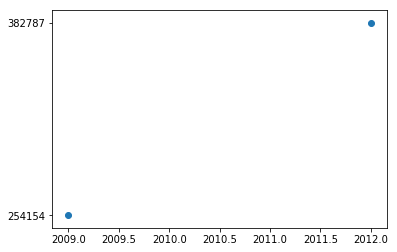

In [32]:
plt.scatter([2009,2012],votos_totales)

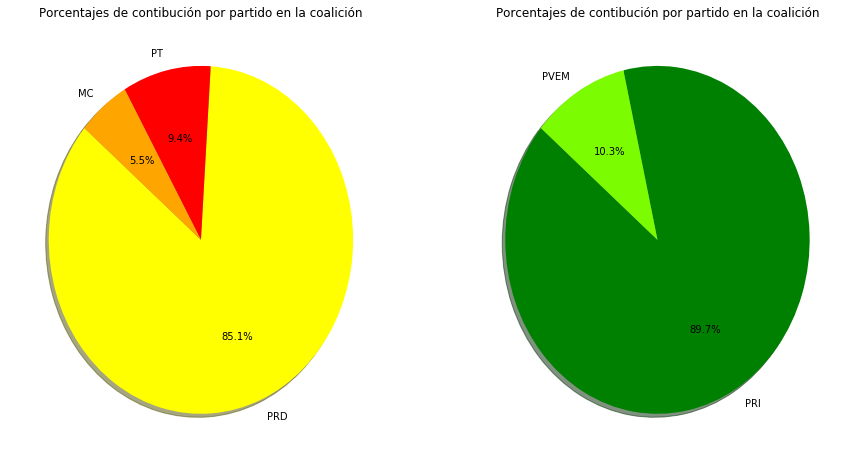

In [33]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
comun2=["PRD","PT","MC"]
comun3=["PRI","PVEM"]
size=[sum(dt2["PRD"]),sum(dt2["PT"]),sum(dt2["MC"])]
size2=[sum(dt2["PRI"]),sum(dt2["PVEM"])]
colors=["yellow","red","orange"]
colors2=["green","lawngreen"]
#Plot
ax=axes[0].pie(size,labels=comun2,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
ax=axes[1].pie(size2,labels=comun3,colors=colors2,autopct='%1.1f%%',shadow=True,startangle=140)
ax=axes[0].set_title("Porcentajes de contibución por partido en la coalición")
ax=axes[1].set_title("Porcentajes de contibución por partido en la coalición")
plt.show()

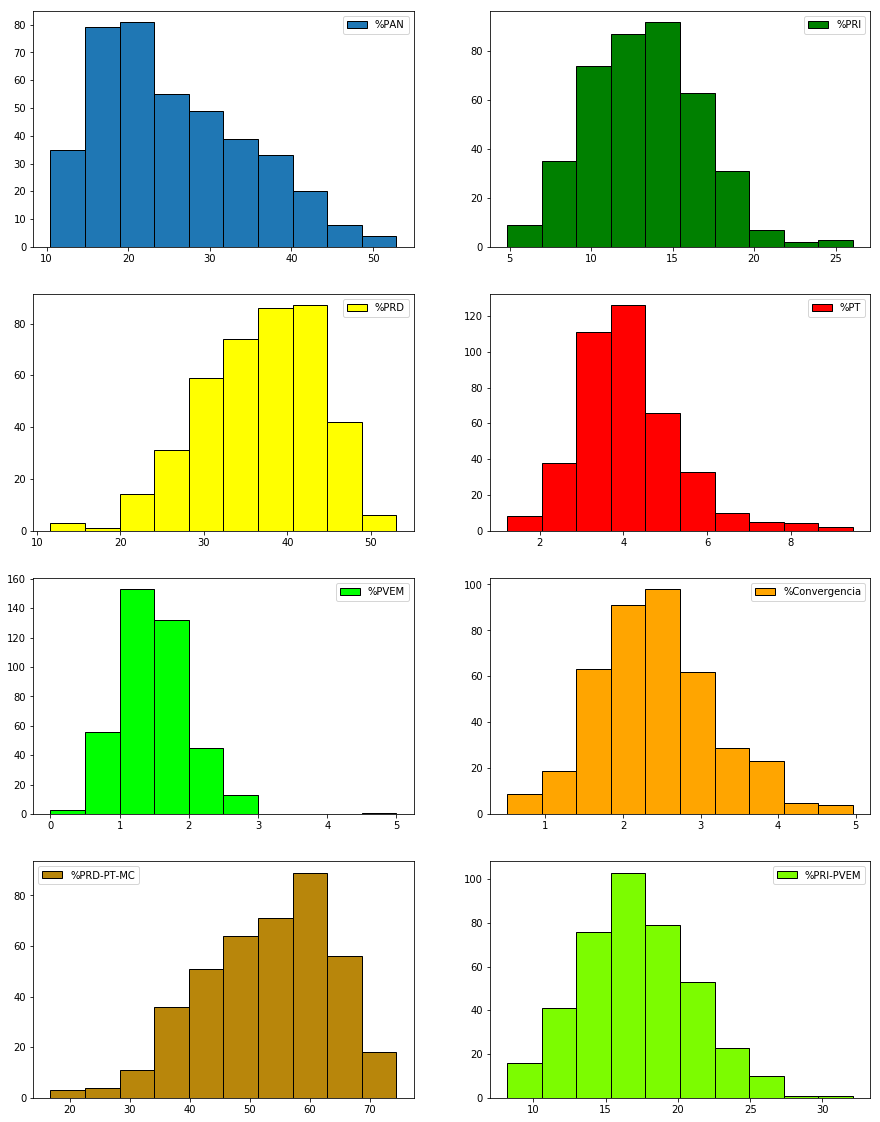

In [34]:
fig, axes=plt.subplots(4,2,figsize=(15,20))
ax=axes[0][0].hist(dt2["%PAN"],label="%PAN",ec="black")
ax=axes[0][0].legend()
ax=axes[0][1].hist(dt2["%PRI"],color="green",label="%PRI",ec="black")
ax=axes[0][1].legend()
ax=axes[1][0].hist(dt2["%PRD"],color="yellow",label="%PRD",ec="black")
ax=axes[1][0].legend()
ax=axes[1][1].hist(dt2["%PT"],color="red",label="%PT",ec="black")
ax=axes[1][1].legend()
ax=axes[2][0].hist(dt2["%PVEM"],color="lime",label="%PVEM",ec="black")
ax=axes[2][0].legend()
ax=axes[2][1].hist(dt2["%MC"],color="orange",label="%Convergencia",ec="black")
ax=axes[2][1].legend()
ax=axes[3][0].hist(dt2['%TOTAL PRD-PT-MC'],color="darkgoldenrod",label="%PRD-PT-MC",ec="black")
ax=axes[3][0].legend()
ax=axes[3][1].hist(dt2['%TOTAL PRI-PVEM'],color="lawngreen",label="%PRI-PVEM",ec="black")
ax=axes[3][1].legend()

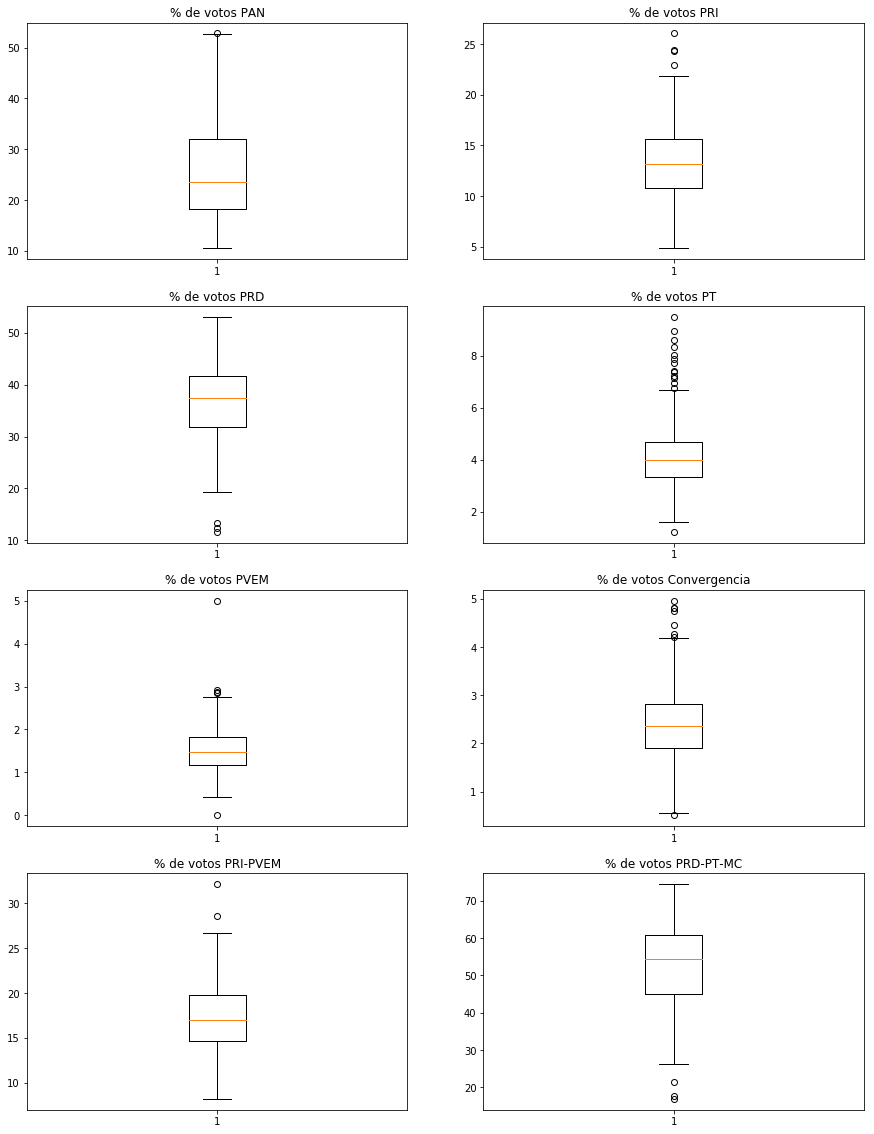

In [35]:
fig, axes=plt.subplots(4,2,figsize=(15,20))
ax=axes[0][0].boxplot(dt2["%PAN"])
ax=axes[0][0].set_title('% de votos PAN')
ax=axes[0][1].boxplot(dt2["%PRI"])
ax=axes[0][1].set_title('% de votos PRI')
ax=axes[1][0].boxplot(dt2["%PRD"])
ax=axes[1][0].set_title('% de votos PRD')
ax=axes[1][1].boxplot(dt2["%PT"])
ax=axes[1][1].set_title('% de votos PT')
ax=axes[2][0].boxplot(dt2["%PVEM"])
ax=axes[2][0].set_title('% de votos PVEM')
ax=axes[2][1].boxplot(dt2["%MC"])
ax=axes[2][1].set_title('% de votos Convergencia')
ax=axes[3][0].boxplot(dt2["%TOTAL PRI-PVEM"])
ax=axes[3][0].set_title('% de votos PRI-PVEM')
ax=axes[3][1].boxplot(dt2['%TOTAL PRD-PT-MC'])
ax=axes[3][1].set_title('% de votos PRD-PT-MC')

[]

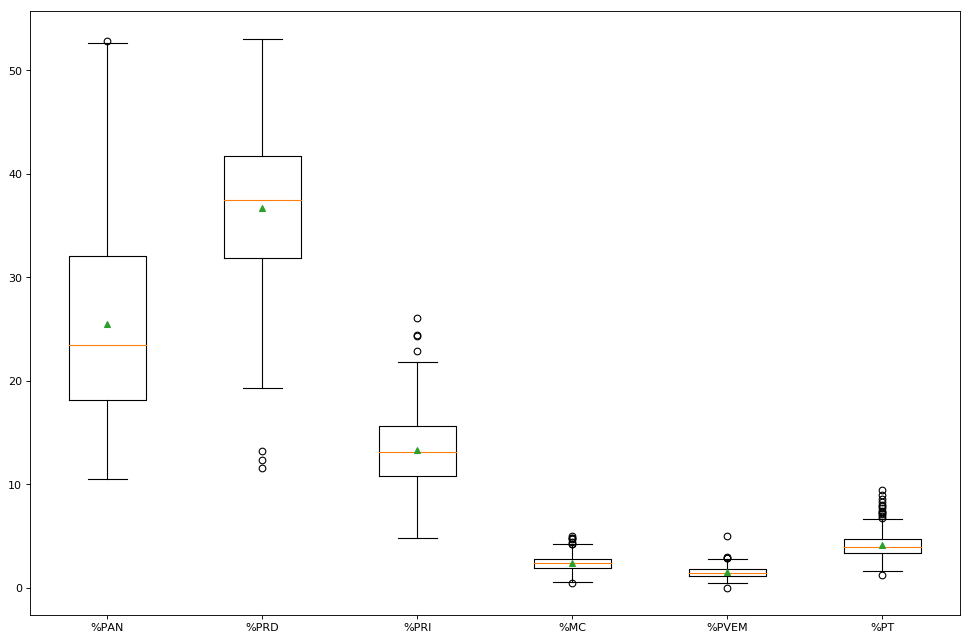

In [36]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([dt2["%PAN"],dt2["%PRD"],dt2["%PRI"],dt2["%MC"],dt2["%PVEM"],dt2["%PT"]],labels=["%PAN","%PRD","%PRI","%MC","%PVEM","%PT"],showmeans=True)
plt.plot()

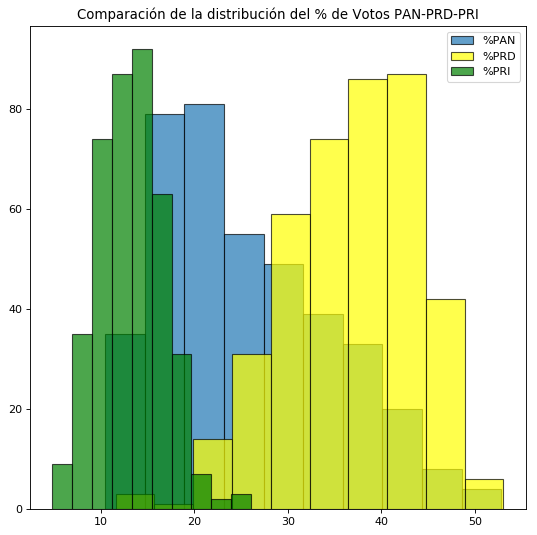

In [37]:
from matplotlib import pyplot
plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
x =dt2["%PAN"]
y =dt2["%PRD"]
z=dt2["%PRI"]
pyplot.hist(x,alpha=0.7,label='%PAN',ec="black")
pyplot.hist(y,alpha=0.7,color="yellow",label='%PRD',ec="black")
pyplot.hist(z,alpha=0.7,color="green",label='%PRI',ec="black")
pyplot.legend(loc='upper right')
pyplot.title("Comparación de la distribución del % de Votos PAN-PRD-PRI")
pyplot.show()

# Análisis de datos. Elecciones 2015

In [38]:
df5=pd.read_csv(ruta+"co_2015.csv")

In [39]:
df5.head()

,DEL,DTTO,SEC,LN,PE,PAN,PRI,PRD,PVEM,PT,...,%NA,%MORENA,%PH,%ES,%PRI_PVEM,%PRD_PT,%CNR,%TOTAL PRI-PVEM,%TOTAL PRD-PT,%VN
0,3,26,345,1506,1583,134,75,121,24,10,...,2.529762,26.934524,2.678571,3.571429,0.446429,0.297619,0.446429,15.178571,19.791667,6.250000
1,3,26,346,387,402,51,33,23,2,0,...,1.428571,26.190476,5.238095,3.333333,0.952381,0.000000,0.476190,17.619048,10.952381,4.761905
2,3,26,347,1753,1826,195,112,72,18,8,...,1.454545,27.878788,3.272727,3.636364,0.363636,0.000000,0.242424,16.121212,9.696970,8.484848
3,3,26,348,2151,2233,197,159,220,27,12,...,1.140684,24.239544,2.281369,3.231939,0.000000,0.285171,0.475285,17.680608,22.338403,7.794677
4,3,26,349,1051,1094,125,84,83,19,4,...,2.181818,19.636364,2.727273,5.454545,0.545455,0.000000,0.909091,19.272727,15.818182,8.727273


In [40]:
list(df5.columns)

['DEL',
 'DTTO',
 'SEC',
 'LN',
 'PE',
 'PAN',
 'PRI',
 'PRD',
 'PVEM',
 'PT',
 'MC',
 'NA',
 'MORENA',
 'PH',
 'ES',
 'PRI_PVEM',
 'PRD_PT',
 'CNR',
 'TOTAL PRI-PVEM',
 'TOTAL PRD-PT',
 'VN',
 'VT',
 '%PAN',
 '%PRI',
 '%PRD',
 '%PVEM',
 '%PT',
 '%MC',
 '%NA',
 '%MORENA',
 '%PH',
 '%ES',
 '%PRI_PVEM',
 '%PRD_PT',
 '%CNR',
 '%TOTAL PRI-PVEM',
 '%TOTAL PRD-PT',
 '%VN']

In [41]:
partidos=["PAN","PRI","PRD","PVEM","PT","MC","NA","MORENA","PH","ES","TOTAL PRI-PVEM","TOTAL PRD-PT","CNR","VN"]

In [42]:
conteo=[]
names=[]
total=0
for i in partidos:
    conteo.append(sum(df5[i]))
    names.append(i)
    if i not in ["PRI","PRD","PVEM","PT"]:
        total+=sum(df5[i])
    

In [43]:
vt=pd.DataFrame(names)
vt.columns=["FUERZA POLÍTICA"]
vt["VOTOS"]=conteo
vt

,FUERZA POLÍTICA,VOTOS
0,PAN,42735
1,PRI,29303
2,PRD,61187
3,PVEM,7268
4,PT,3065
5,MC,10794
6,NA,5184
7,MORENA,59242
8,PH,7584
9,ES,12301


In [44]:
pd.DataFrame(df5["VT"].describe())

,VT
count,403.000000
mean,645.399504
std,220.528699
min,156.000000
25%,513.000000
50%,630.000000
75%,774.000000
max,1936.000000


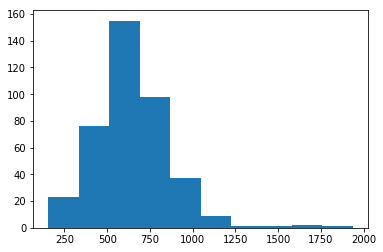

In [45]:
plt.hist(df5["VT"])
plt.show()

In [46]:
print(sum(df["Votación Total"]),sum(dt2["VOTACION\nTOTAL"]),sum(df5["VT"]))

254154 382787 260096


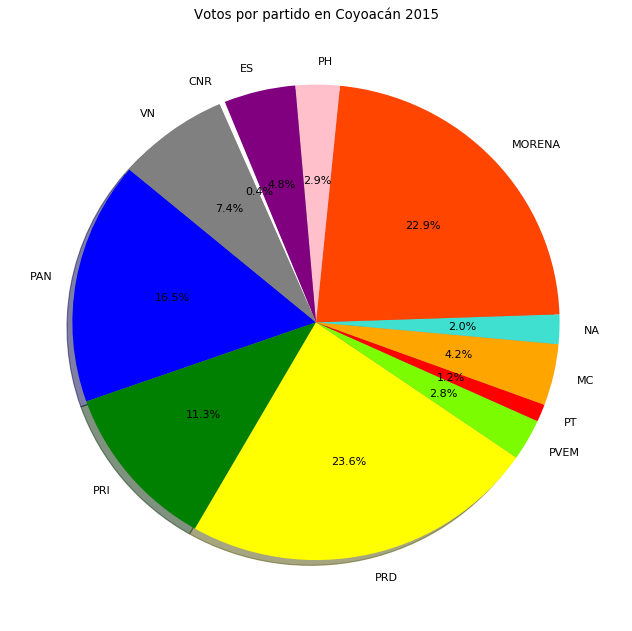

In [47]:
plt.figure(num=None,figsize=(8,8),dpi=80,facecolor='w',edgecolor='k')
participantes=[i for i in partidos if i not in ["TOTAL PRI-PVEM","TOTAL PRD-PT"]]
totales2=[]
for i in participantes:
    totales2.append(sum(df5[i]))
colors=["blue","green","yellow","lawngreen","red","orange","turquoise","orangered","pink","purple","white","gray"]

plt.pie(totales2,labels=participantes,colors=colors, autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis=("equal")
plt.title("Votos por partido en Coyoacán 2015")
plt.tight_layout()
plt.show()

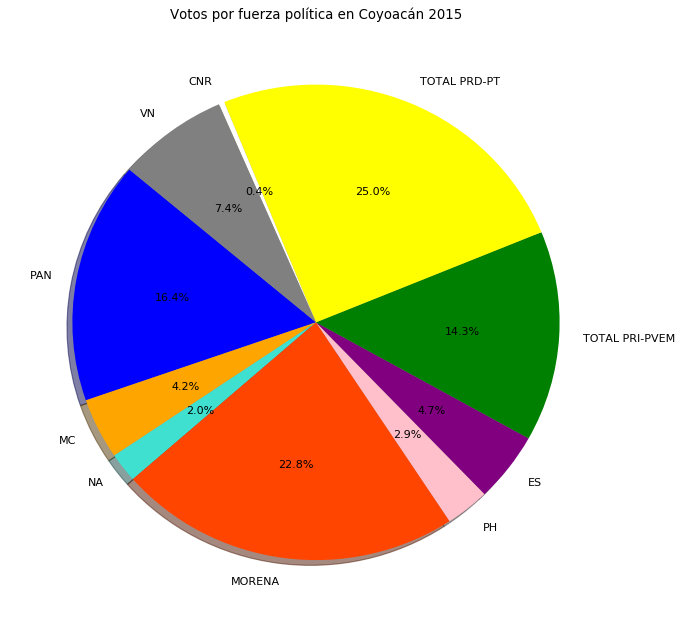

In [48]:
plt.figure(num=None,figsize=(8,8),dpi=80,facecolor='w',edgecolor='k')
participantes=[i for i in partidos if i not in ["PRI","PVEM","PRD","PT"]]
totales2=[]
for i in participantes:
    totales2.append(sum(df5[i]))
colors=["blue","orange","turquoise","orangered","pink","purple","green","yellow","white","gray"]

plt.pie(totales2,labels=participantes,colors=colors, autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis=("equal")
plt.title("Votos por fuerza política en Coyoacán 2015")
plt.tight_layout()
plt.show()

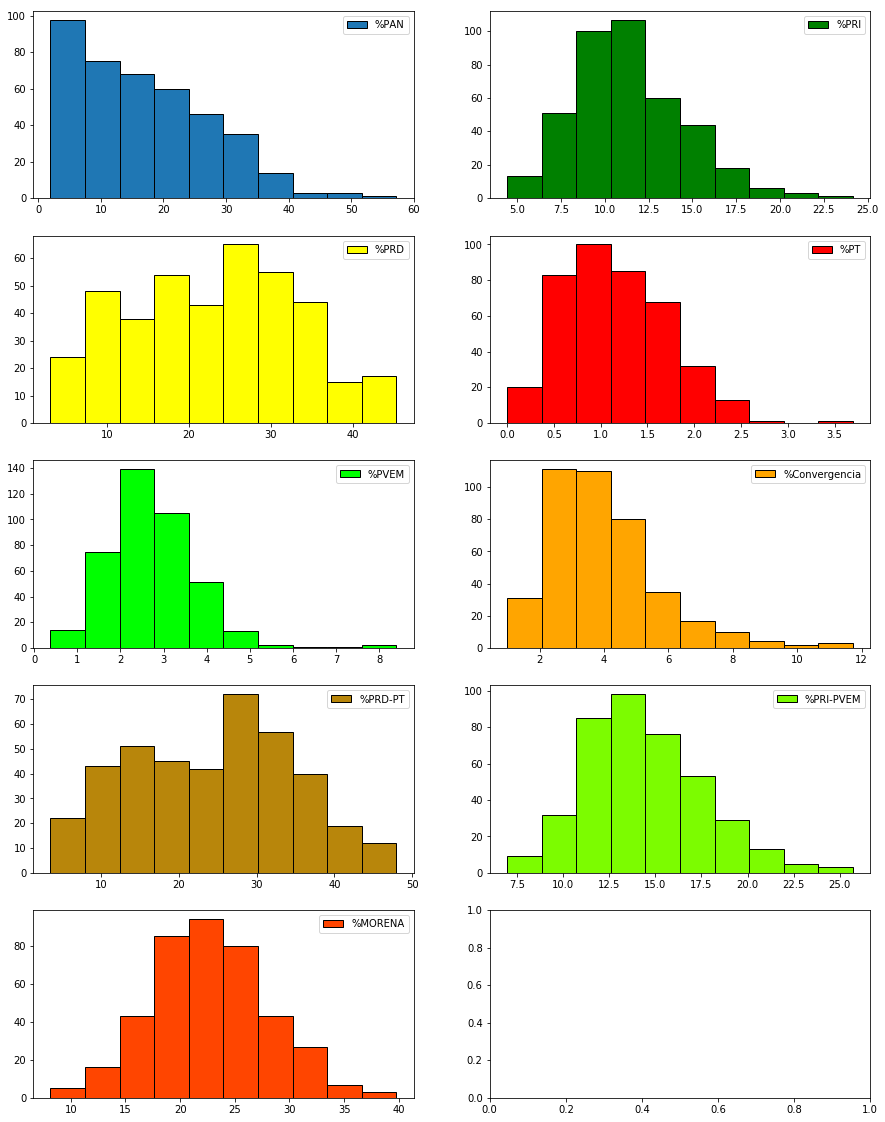

In [49]:
fig, axes=plt.subplots(5,2,figsize=(15,20))
ax=axes[0][0].hist(df5["%PAN"],label="%PAN",ec="black")
ax=axes[0][0].legend()
ax=axes[0][1].hist(df5["%PRI"],color="green",label="%PRI",ec="black")
ax=axes[0][1].legend()
ax=axes[1][0].hist(df5["%PRD"],color="yellow",label="%PRD",ec="black")
ax=axes[1][0].legend()
ax=axes[1][1].hist(df5["%PT"],color="red",label="%PT",ec="black")
ax=axes[1][1].legend()
ax=axes[2][0].hist(df5["%PVEM"],color="lime",label="%PVEM",ec="black")
ax=axes[2][0].legend()
ax=axes[2][1].hist(df5["%MC"],color="orange",label="%Convergencia",ec="black")
ax=axes[2][1].legend()
ax=axes[3][0].hist(df5['%TOTAL PRD-PT'],color="darkgoldenrod",label="%PRD-PT",ec="black")
ax=axes[3][0].legend()
ax=axes[3][1].hist(df5['%TOTAL PRI-PVEM'],color="lawngreen",label="%PRI-PVEM",ec="black")
ax=axes[3][1].legend()
ax=axes[4][0].hist(df5['%MORENA'],color="orangered",label="%MORENA",ec="black")
ax=axes[4][0].legend()

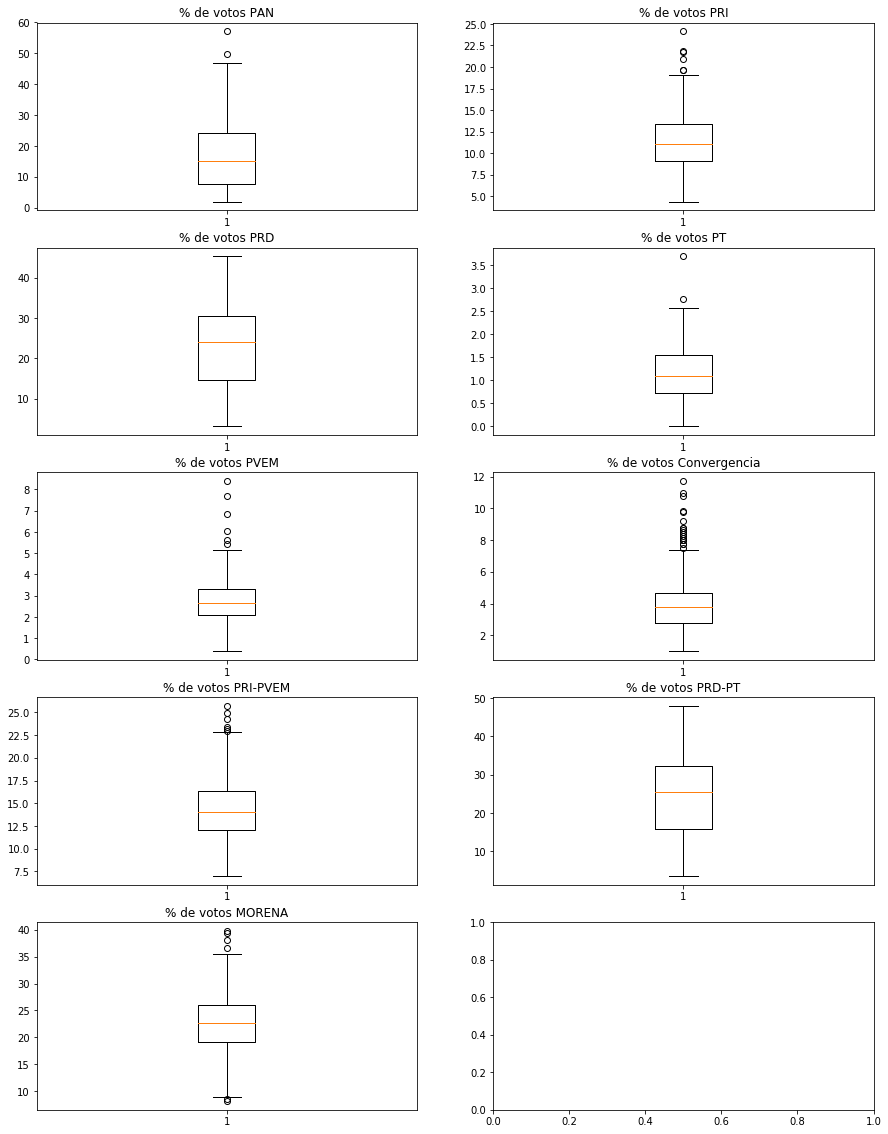

In [50]:
fig, axes=plt.subplots(5,2,figsize=(15,20))
ax=axes[0][0].boxplot(df5["%PAN"])
ax=axes[0][0].set_title('% de votos PAN')
ax=axes[0][1].boxplot(df5["%PRI"])
ax=axes[0][1].set_title('% de votos PRI')
ax=axes[1][0].boxplot(df5["%PRD"])
ax=axes[1][0].set_title('% de votos PRD')
ax=axes[1][1].boxplot(df5["%PT"])
ax=axes[1][1].set_title('% de votos PT')
ax=axes[2][0].boxplot(df5["%PVEM"])
ax=axes[2][0].set_title('% de votos PVEM')
ax=axes[2][1].boxplot(df5["%MC"])
ax=axes[2][1].set_title('% de votos Convergencia')
ax=axes[3][0].boxplot(df5["%TOTAL PRI-PVEM"])
ax=axes[3][0].set_title('% de votos PRI-PVEM')
ax=axes[3][1].boxplot(df5['%TOTAL PRD-PT'])
ax=axes[3][1].set_title('% de votos PRD-PT')
ax=axes[4][0].boxplot(df5['%MORENA'])
ax=axes[4][0].set_title('% de votos MORENA')

[]

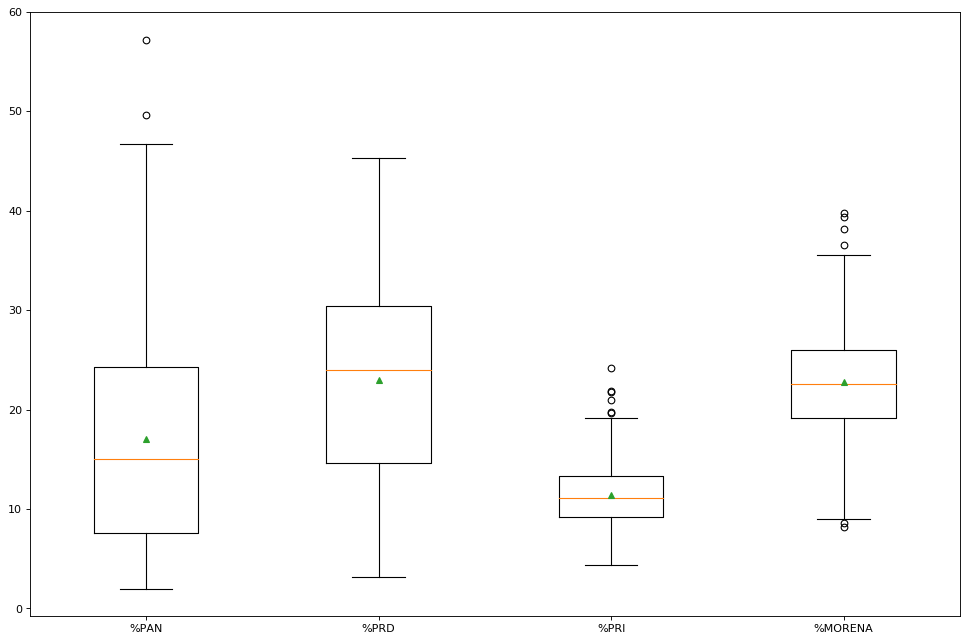

In [51]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([df5["%PAN"],df5["%PRD"],df5["%PRI"],df5["%MORENA"]],labels=["%PAN","%PRD","%PRI","%MORENA"],showmeans=True)
plt.plot()

In [52]:
import benford as bf

Initialized sequence with 403 registries.

Test performed on 403 registries.
Discarded 0 records < 1 after preparation.


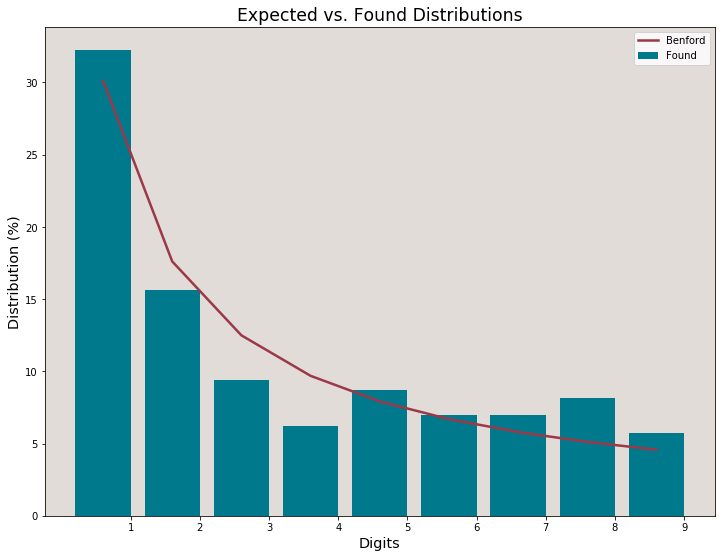

In [53]:
f1d = bf.first_digits(df5["PAN"], digs=1, decimals=8)

Initialized sequence with 403 registries.

Test performed on 403 registries.
Discarded 0 records < 1 after preparation.


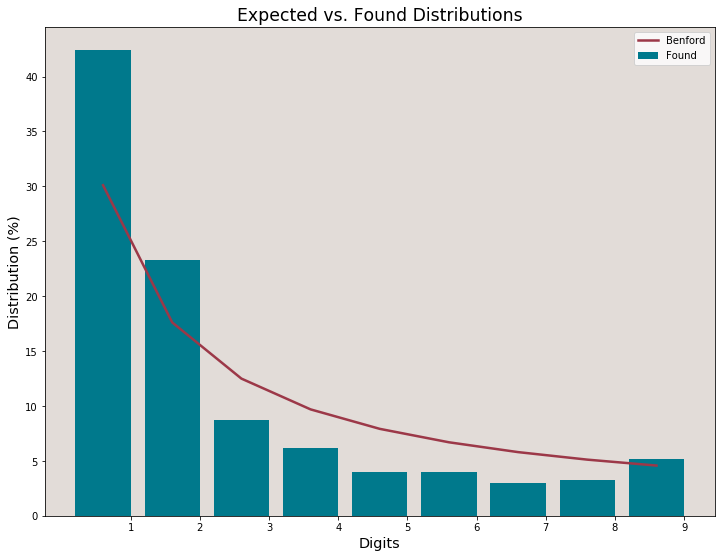

In [54]:
f1d = bf.first_digits(df5["PRD"], digs=1, decimals=8)

Initialized sequence with 403 registries.

Test performed on 403 registries.
Discarded 0 records < 1 after preparation.


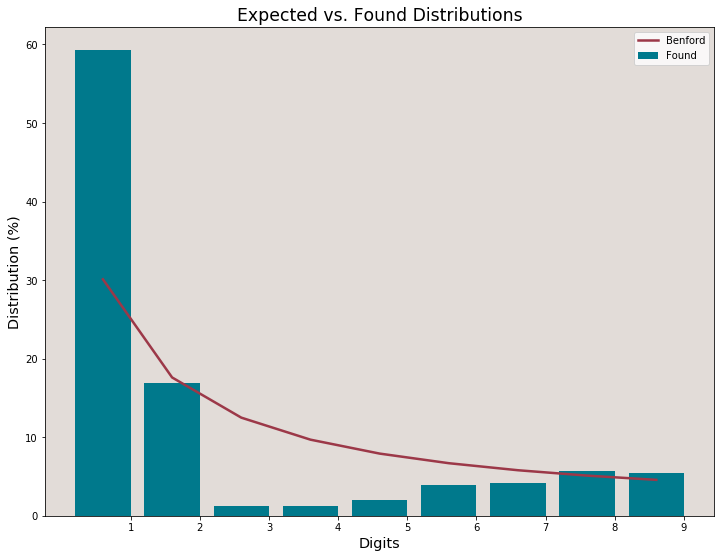

In [55]:
f1d = bf.first_digits(df5["MORENA"], digs=1, decimals=8)

# Análisis de Elecciones 2018 

In [56]:
df8=pd.read_csv(ruta+"co_2018.csv")

In [57]:
df8.head()

,Sección,id distrito,total boletas sobrantes,total personas votaron,total votos sacados,PAN,PRI,PRD,PVEM,PT,...,%TOTAL_MORENA-PES-PT,%TOTAL_PAN-PRD-MC,IRAE,ICE_partidos,ICE_coaliciones,Partidos,ICEcoPartidos,ganador_partido,NEP,Coalicion_ganadora
0,345,78,443,1185,1179,254,115,262,35,22,...,32.489451,47.932489,0.6533,0.791541,0.677817,%MORENA-%PRD,%TOTAL_PAN-PRD-MC-%TOTAL_MORENA-PES-PT,%MORENA,2.884338,%TOTAL_PAN-PRD-MC
1,346,26,92,320,320,96,43,38,11,5,...,32.187500,46.875000,0.6571,0.958333,0.686667,%PAN-%MORENA,%TOTAL_PAN-PRD-MC-%TOTAL_MORENA-PES-PT,%PAN,2.916302,%TOTAL_PAN-PRD-MC
2,347,78,479,1358,1357,411,154,207,44,14,...,29.307806,50.515464,0.6443,0.892944,0.580175,%PAN-%MORENA,%TOTAL_PAN-PRD-MC-%TOTAL_MORENA-PES-PT,%PAN,2.811358,%TOTAL_PAN-PRD-MC
3,348,78,578,1708,1708,372,200,401,48,22,...,30.210773,48.419204,0.6591,0.864224,0.623942,%MORENA-%PRD,%TOTAL_PAN-PRD-MC-%TOTAL_MORENA-PES-PT,%MORENA,2.933412,%TOTAL_PAN-PRD-MC
4,349,52,282,810,811,268,110,132,23,7,...,24.938272,52.098765,0.6465,0.679104,0.478673,%PAN-%MORENA,%TOTAL_PAN-PRD-MC-%TOTAL_MORENA-PES-PT,%PAN,2.828854,%TOTAL_PAN-PRD-MC


In [58]:
df8.columns

Index(['Sección', 'id distrito', 'total boletas sobrantes',
       'total personas votaron', 'total votos sacados', 'PAN', 'PRI', 'PRD',
       'PVEM', 'PT', 'MC', 'NA', 'MORENA', 'PES', 'PH',
       'C.Común (PT-MORENA-PES)', 'C.Común (PT-MORENA)', 'C.Común (PT-PES)',
       'C.Común (MORENA-PES)', 'Coalición (PAN-PRD-MC)', 'Coalición (PAN-PRD)',
       'Coalición (PAN-MC)', 'Coalición (PRD-MC)', 'TOTAL PAN-PRD-MC',
       'TOTAL MORENA-PT-PES', 'Nulos', 'No registrados',
       'total votos asentados', 'total votos calculados', 'PADRON_TOTAL',
       'LISTANOMINAL_TOTAL', '%PAN', '%PRI', '%PRD', '%PVEM', '%PT', '%MC',
       '%NA', '%MORENA', '%PES', '%PH', '%C.Común (PT-MORENA-PES)',
       '%C.Común (PT-MORENA)', '%C.Común (PT-PES)', '%C.Común (MORENA-PES)',
       '%Coalición (PAN-PRD-MC)', '%Coalición (PAN-PRD)',
       '%Coalición (PAN-MC)', '%Coalición (PRD-MC)', '%Nulos',
       '%No registrados', '%TOTAL_MORENA-PES-PT', '%TOTAL_PAN-PRD-MC', 'IRAE',
       'ICE_partidos', 'ICE

In [59]:
votantes=(sum(df["Votación Total"]),sum(dt2["VOTACION\nTOTAL"]),sum(df5["VT"]),sum(df8["total personas votaron"]))
partidos=['PAN', 'PRI', 'PRD',
       'PVEM', 'PT', 'MC', 'NA', 'MORENA', 'PES', 'PH',
       'C.Común (PT-MORENA-PES)', 'C.Común (PT-MORENA)', 'C.Común (PT-PES)',
       'C.Común (MORENA-PES)', 'Coalición (PAN-PRD-MC)', 'Coalición (PAN-PRD)',
       'Coalición (PAN-MC)', 'Coalición (PRD-MC)', 'TOTAL PAN-PRD-MC',
       'TOTAL MORENA-PT-PES', 'Nulos', 'No registrados']

In [64]:
totales=[]
nombres=[]
total=0
for i in partidos:
    totales.append(sum(df8[i]))
    nombres.append(i)
    if i not in ["PRD","PT","Convergencia",'Candidato Común']:
        total+=sum(df8[i])

tabla=pd.DataFrame(nombres)
tabla.columns=["FUERZA POLÍTICA"]
tabla["NUM VOTOS"]=totales
tabla
    

,FUERZA POLÍTICA,NUM VOTOS
0,PAN,80720
1,PRI,38689
2,PRD,94439
3,PVEM,12571
4,PT,7080
5,MC,10284
6,NA,6940
7,MORENA,127703
8,PES,4663
9,PH,8998


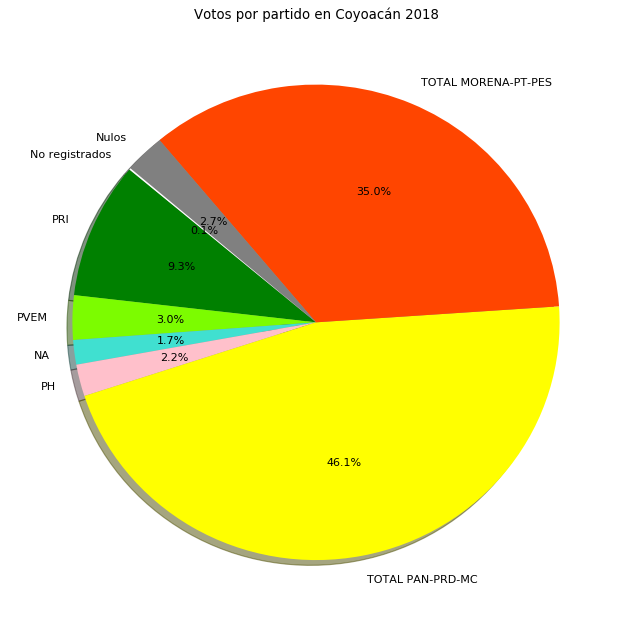

In [65]:
plt.figure(num=None,figsize=(8,8),dpi=80,facecolor='w',edgecolor='k')
participantes=[i for i in partidos if i not in ['C.Común (PT-MORENA-PES)', 'C.Común (PT-MORENA)', 'C.Común (PT-PES)',
       'C.Común (MORENA-PES)', 'Coalición (PAN-PRD-MC)', 'Coalición (PAN-PRD)',
       'Coalición (PAN-MC)', 'Coalición (PRD-MC)','PAN','PRD','PT','MORENA','MC','PES']]
totales2=[]
for i in participantes:
    totales2.append(sum(df8[i]))
colors=["green","lawngreen","turquoise","pink","yellow","orangered","gray","white"]

plt.pie(totales2,labels=participantes,colors=colors, autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis=("equal")
plt.title("Votos por partido en Coyoacán 2018")
plt.tight_layout()
plt.show()

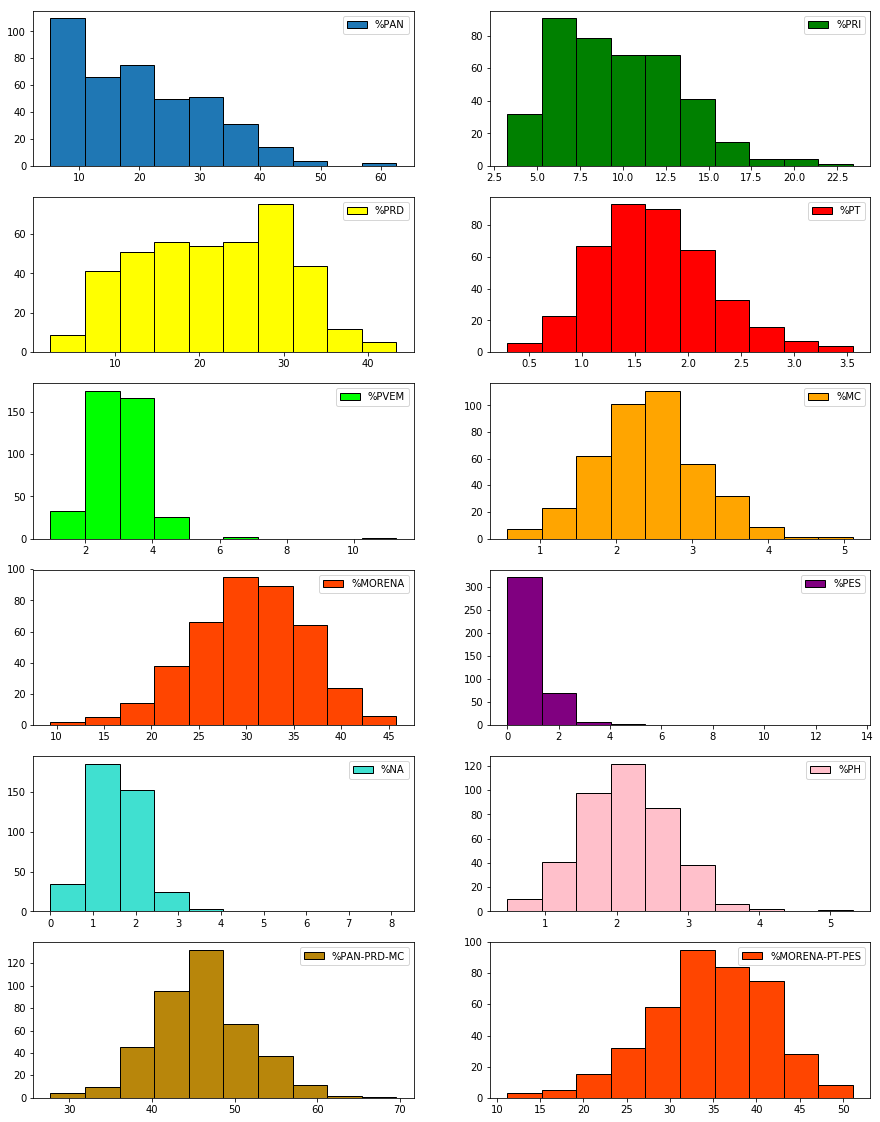

In [66]:
fig, axes=plt.subplots(6,2,figsize=(15,20))
ax=axes[0][0].hist(df8["%PAN"],label="%PAN",ec="black")
ax=axes[0][0].legend()
ax=axes[0][1].hist(df8["%PRI"],color="green",label="%PRI",ec="black")
ax=axes[0][1].legend()
ax=axes[1][0].hist(df8["%PRD"],color="yellow",label="%PRD",ec="black")
ax=axes[1][0].legend()
ax=axes[1][1].hist(df8["%PT"],color="red",label="%PT",ec="black")
ax=axes[1][1].legend()
ax=axes[2][0].hist(df8["%PVEM"],color="lime",label="%PVEM",ec="black")
ax=axes[2][0].legend()
ax=axes[2][1].hist(df8["%MC"],color="orange",label="%MC",ec="black")
ax=axes[2][1].legend()
ax=axes[3][0].hist(df8["%MORENA"],color="orangered",label="%MORENA",ec="black")
ax=axes[3][0].legend()
ax=axes[3][1].hist(df8["%PES"],color="purple",label="%PES",ec="black")
ax=axes[3][1].legend()
ax=axes[4][0].hist(df8["%NA"],color="turquoise",label="%NA",ec="black")
ax=axes[4][0].legend()
ax=axes[4][1].hist(df8["%PH"],color="pink",label="%PH",ec="black")
ax=axes[4][1].legend()
ax=axes[5][0].hist(df8['%TOTAL_PAN-PRD-MC'],color="darkgoldenrod",label="%PAN-PRD-MC",ec="black")
ax=axes[5][0].legend()
ax=axes[5][1].hist(df8['%TOTAL_MORENA-PES-PT'],color="orangered",label="%MORENA-PT-PES",ec="black")
ax=axes[5][1].legend()

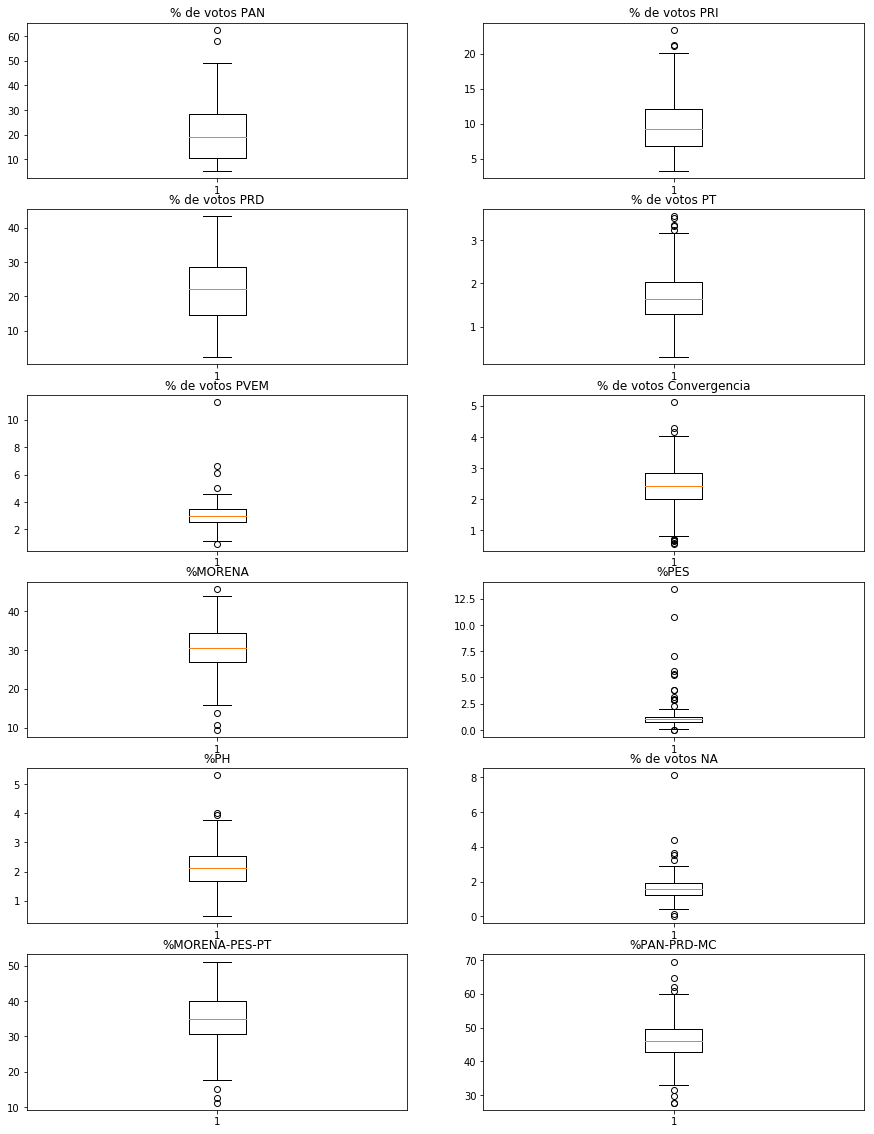

In [67]:
fig, axes=plt.subplots(6,2,figsize=(15,20))
ax=axes[0][0].boxplot(df8["%PAN"])
ax=axes[0][0].set_title('% de votos PAN')
ax=axes[0][1].boxplot(df8["%PRI"])
ax=axes[0][1].set_title('% de votos PRI')
ax=axes[1][0].boxplot(df8["%PRD"])
ax=axes[1][0].set_title('% de votos PRD')
ax=axes[1][1].boxplot(df8["%PT"])
ax=axes[1][1].set_title('% de votos PT')
ax=axes[2][0].boxplot(df8["%PVEM"])
ax=axes[2][0].set_title('% de votos PVEM')
ax=axes[2][1].boxplot(df8["%MC"])
ax=axes[2][1].set_title('% de votos Convergencia')
ax=axes[3][0].boxplot(df8["%MORENA"])
ax=axes[3][0].set_title('%MORENA')
ax=axes[3][1].boxplot(df8['%PES'])
ax=axes[3][1].set_title('%PES')
ax=axes[4][0].boxplot(df8['%PH'])
ax=axes[4][0].set_title('%PH')
ax=axes[4][1].boxplot(df8['%NA'])
ax=axes[4][1].set_title('% de votos NA')
ax=axes[5][0].boxplot(df8['%TOTAL_MORENA-PES-PT'])
ax=axes[5][0].set_title('%MORENA-PES-PT')
ax=axes[5][1].boxplot(df8['%TOTAL_PAN-PRD-MC'])
ax=axes[5][1].set_title('%PAN-PRD-MC')

In [ ]:
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([df8["%PAN"],df8["%PRD"],df8["%MORENA"],df8["%TOTAL_MORENA-PES-PT"],df8["%TOTAL_PAN-PRD-MC"]],labels=["%PAN","%PRD","%MORENA","%TOTAL MORENA-PES-PT","%TOTAL PAN-PRD-MC"],showmeans=True)
plt.plot()

In [ ]:
plt.bar(np.arange(4), votantes) 
plt.xticks(np.arange(4),["2009","2012","2015","2018"], rotation = 45)
plt.show()

In [ ]:
sum(df8["TOTAL MORENA-PT-PES"])

In [ ]:
sum(df8["TOTAL PAN-PRD-MC"])